<a href="https://colab.research.google.com/github/disakuz/Python_netbooks/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D1%8B%D0%B9%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%20%D0%9A%D1%83%D0%B7%D1%8C%D0%BC%D0%B8%D0%BD%20%D0%94.%D0%90..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

from datetime import date
import holidays

plt.style.use('ggplot')

In [ ]:
!pip install prophet

import prophet

In [ ]:
from prophet import Prophet

https://drive.google.com/file/d/1nUDVmuziYxrMWl2iZS_ZXJ-3TkXOqlNe/view?usp=sharing

In [ ]:
!gdown --id 1nUDVmuziYxrMWl2iZS_ZXJ-3TkXOqlNe

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nUDVmuziYxrMWl2iZS_ZXJ-3TkXOqlNe
To: /content/24.03 to 11.06.csv
100% 5.96M/5.96M [00:00<00:00, 98.9MB/s]


In [ ]:
df = pd.read_csv('/content/24.03 to 11.06.csv',delimiter=';', skiprows=0, low_memory=False)

In [ ]:
df.head()

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Имя покупателя,Телефон покупателя,Email покупателя,Имя получателя,Телефон получателя,Адрес доставки,Индекс,Склад отгрузки,Перевозчик,Название метода
0,46031652-0041,46031652-0041-1,2023-06-11 22:09:51,2023-06-12 14:00:00,Доставлен,2023-06-18 15:32:34,7320.0,RUB,Кулак поворотный Zikmar Z46426R,714806248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
1,07114565-0160,07114565-0160-1,2023-06-11 21:33:34,2023-06-12 14:00:00,Доставлен,2023-06-16 10:26:05,1639.0,RUB,Регулятор напряжения генератора для автомобиле...,719693617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
2,0107566318-0072,0107566318-0072-2,2023-06-11 20:41:41,2023-06-12 14:00:00,Доставлен,2023-06-15 10:26:18,2040.0,RUB,"Сайлентблок, рычаг независимой подвески колеса...",729769608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
3,50067008-0046,50067008-0046-2,2023-06-11 19:49:07,2023-06-12 14:00:00,Доставлен,2023-06-18 10:38:51,2800.0,RUB,подшипник подвесной карданного вала аналог o.e...,611153957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
4,93696454-0002,93696454-0002-2,2023-06-11 19:41:51,2023-06-12 14:00:00,Доставлен,2023-06-21 07:06:54,479.0,RUB,"Ключ накидной удлинённый 8x10мм, 514108",888628723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Номер заказа               8070 non-null   object 
 1   Номер отправления          8070 non-null   object 
 2   Принят в обработку         8070 non-null   object 
 3   Дата отгрузки              8070 non-null   object 
 4   Статус                     8070 non-null   object 
 5   Дата доставки              7482 non-null   object 
 6   Сумма отправления          8070 non-null   float64
 7   Код валюты отправления     8070 non-null   object 
 8   Наименование товара        8070 non-null   object 
 9   OZON id                    8070 non-null   int64  
 10  Артикул                    8070 non-null   object 
 11  Итоговая стоимость товара  8070 non-null   float64
 12  Код валюты товара          8070 non-null   object 
 13  Количество                 8070 non-null   int64

In [ ]:
df_index = df.columns

In [ ]:
df_index_en = ['Order number',
  'Number of departure',
  'Accepted for processing',
  'Shipping date',
  'Status',
  'Delivery date',
  'Sending amount',
  'Departure currency code',
  'Name of product',
  'OZON id',
  'Vendor code',
  'Total cost of goods',
  'Product currency code',
  'Quantity',
  'Cost of delivery',
  'Associated Departures',
  'Product price before discounts',
  'Discount %',
  'Discount rub',
  'Stock',
  'Top Barcode',
  'Lower barcode',
  'Shipping cluster',
  'Delivery cluster',
  'Delivery region',
  'Delivery city',
  'Delivery method',
  'Customer segment',
  'Payment method',
  'Entity',
  'Buyer name',
  'Customer phone',
  'Buyer Email',
  'Receiver name',
  'Recipient phone',
  'Delivery address',
  'Index',
  'Shipping warehouse',
  'Carrier',
  'Method name']

In [ ]:
df.columns = df_index_en

In [ ]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [ ]:
df.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,departure_currency_code,name_of_product,ozon_id,...,buyer_name,customer_phone,buyer_email,receiver_name,recipient_phone,delivery_address,index,shipping_warehouse,carrier,method_name
0,46031652-0041,46031652-0041-1,2023-06-11 22:09:51,2023-06-12 14:00:00,Доставлен,2023-06-18 15:32:34,7320.0,RUB,Кулак поворотный Zikmar Z46426R,714806248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
1,07114565-0160,07114565-0160-1,2023-06-11 21:33:34,2023-06-12 14:00:00,Доставлен,2023-06-16 10:26:05,1639.0,RUB,Регулятор напряжения генератора для автомобиле...,719693617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
2,0107566318-0072,0107566318-0072-2,2023-06-11 20:41:41,2023-06-12 14:00:00,Доставлен,2023-06-15 10:26:18,2040.0,RUB,"Сайлентблок, рычаг независимой подвески колеса...",729769608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
3,50067008-0046,50067008-0046-2,2023-06-11 19:49:07,2023-06-12 14:00:00,Доставлен,2023-06-18 10:38:51,2800.0,RUB,подшипник подвесной карданного вала аналог o.e...,611153957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
4,93696454-0002,93696454-0002-2,2023-06-11 19:41:51,2023-06-12 14:00:00,Доставлен,2023-06-21 07:06:54,479.0,RUB,"Ключ накидной удлинённый 8x10мм, 514108",888628723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"


In [ ]:
df.isna().mean()

order_number                      0.000000
number_of_departure               0.000000
accepted_for_processing           0.000000
shipping_date                     0.000000
status                            0.000000
delivery_date                     0.072862
sending_amount                    0.000000
departure_currency_code           0.000000
name_of_product                   0.000000
ozon_id                           0.000000
vendor_code                       0.000000
total_cost_of_goods               0.000000
product_currency_code             0.000000
quantity                          0.000000
cost_of_delivery                  1.000000
associated_departures             0.996406
product_price_before_discounts    0.000000
discount_%                        0.000000
discount_rub                      0.000000
stock                             0.000743
top_barcode                       0.000000
lower_barcode                     0.000124
shipping_cluster                  0.000000
delivery_cl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_number                    8070 non-null   object 
 1   number_of_departure             8070 non-null   object 
 2   accepted_for_processing         8070 non-null   object 
 3   shipping_date                   8070 non-null   object 
 4   status                          8070 non-null   object 
 5   delivery_date                   7482 non-null   object 
 6   sending_amount                  8070 non-null   float64
 7   departure_currency_code         8070 non-null   object 
 8   name_of_product                 8070 non-null   object 
 9   ozon_id                         8070 non-null   int64  
 10  vendor_code                     8070 non-null   object 
 11  total_cost_of_goods             8070 non-null   float64
 12  product_currency_code           80

In [ ]:
df = df.iloc[0:, [0,1,2,3,4,5,6,8,11,13,16,17,19,22,23,24,25,27,]]

In [ ]:
df['accepted_for_processing'] = pd.to_datetime(df['accepted_for_processing']).dt.date
df['shipping_date'] = pd.to_datetime(df['shipping_date']).dt.date
df['delivery_date'] = pd.to_datetime(df['delivery_date']).dt.date

In [ ]:
df['accepted_for_processing'].agg(['min','max'])

min    2023-03-24
max    2023-06-11
Name: accepted_for_processing, dtype: object

#Предварительный анализ данных

In [ ]:
df.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,46031652-0041,46031652-0041-1,2023-06-11,2023-06-12,Доставлен,2023-06-18,7320.0,Кулак поворотный Zikmar Z46426R,7320.0,1,9150.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Тверь,Тверская Область,Удомля,Не премиум
1,07114565-0160,07114565-0160-1,2023-06-11,2023-06-12,Доставлен,2023-06-16,1639.0,Регулятор напряжения генератора для автомобиле...,1639.0,1,2562.0,36%,"Хиты. О!Распродажа, Системная виртуальная скид...",Санкт-Петербург Север,Московская область Запад 5,Московская Область,NaN,Не премиум
2,0107566318-0072,0107566318-0072-2,2023-06-11,2023-06-12,Доставлен,2023-06-15,2040.0,"Сайлентблок, рычаг независимой подвески колеса...",1020.0,2,1275.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Ленинградская область Север,Ленинградская Область,Выборг,Не премиум
3,50067008-0046,50067008-0046-2,2023-06-11,2023-06-12,Доставлен,2023-06-18,2800.0,подшипник подвесной карданного вала аналог o.e...,2800.0,1,3500.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Юг 3,Московская Область,Ступино,Не премиум
4,93696454-0002,93696454-0002-2,2023-06-11,2023-06-12,Доставлен,2023-06-21,479.0,"Ключ накидной удлинённый 8x10мм, 514108",479.0,1,750.0,36%,"Системная виртуальная скидка селлера, Хиты. О!...",Санкт-Петербург Север,Ставрополь,Ставропольский Край,NaN,Не премиум


In [ ]:
df.groupby('name_of_product')['sending_amount'].sum().sort_values(ascending = False)

name_of_product
Глушитель для автомобилей Kia Sportage (10-) 2.0i осн. (алюминизированная сталь), EMM 0358     127182.0
Мочевина (ADBLUE) 10 л Mercedes A004989042014                                                  119148.0
Комплект сцепления, CH11-256                                                                   108925.0
Компрессор кондиционера для автомобилей УАЗ 3163 "Патриот" (05.2012-) (тип Sanden) LCAC0303     89598.0
Радиатор охлаждения для трактора К-701 "Кировец" с дв. ЯМЗ-240 (4-х ряд.) LRC0642               79970.0
                                                                                                 ...   
Клипса пластмассовая P37-1483                                                                      90.0
уплотнительное кольцо для резьбовой пробки маслосливного отверстия FEBI 05597                      90.0
Клипса пластмассовая P37-0069                                                                      90.0
Гайка пластмассовая P37-1450                    

Самые продаваемые товары по сумме

In [ ]:
df['name_of_product'].value_counts().head(10)

Головка шестигранная 7 мм 1/4", 600057                                                                                    69
Накладки резиновые на опоры подставок страховочных до 2-х тонн 900302, 2 шт., 900392                                      41
Крышка маслозаливной горловины для Opel Astra F-J 93-, Opel Vectra A-C 92-, Opel Corsa B-E 96-, BD-2031                   35
Сверло по металлу левого вращения  3.0мм, 212030                                                                          31
накладка педали сцепления и тормоза аналог o.e. 31321-14020                                                               30
Масляный фильтр ХЕНДАЙ (HYUNDAI) 2630035504 / 2630035505 solaris, rio, tucson, creta, солярис, рио, туксон, крета         25
Лампа PY21/5W 12v21/5w (BAY15d) желтая 1 шт., Ganz GIP06037                                                               24
Комплект направляющей гильзы Zekkert BR-1426                                                                              24


<ipython-input-21-212d4e53cb64>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.groupby('accepted_for_processing')['quantity'].sum())


<Axes: xlabel='quantity', ylabel='Density'>

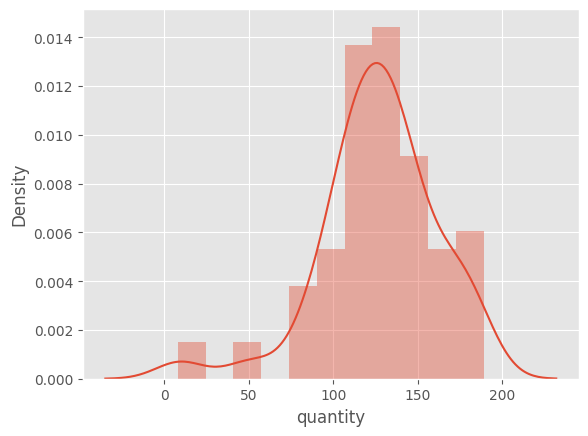

In [ ]:
sns.distplot(df.groupby('accepted_for_processing')['quantity'].sum())

<Axes: >

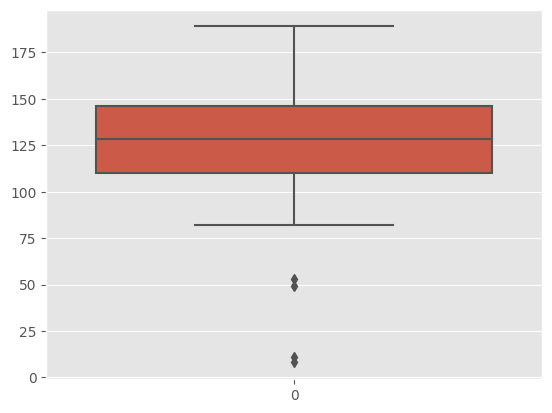

In [ ]:
sns.boxplot(df.groupby('accepted_for_processing')['quantity'].sum())

#Объединение датасетов

from 01.01.23 to 31.03.2023
https://drive.google.com/file/d/13gZ4h7HD-rvz-qxukpYWKSOmW4qzaPgj/view?usp=sharing
*   Новый пункт



In [ ]:
!gdown  --id 13gZ4h7HD-rvz-qxukpYWKSOmW4qzaPgj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13gZ4h7HD-rvz-qxukpYWKSOmW4qzaPgj
To: /content/01.01.23 to 22.03.23.csv
100% 3.63M/3.63M [00:00<00:00, 60.1MB/s]


In [ ]:
df_1 = pd.read_csv('/content/01.01.23 to 22.03.23.csv',delimiter=';', skiprows=0, low_memory=False)

In [ ]:
df_1_index_en = ['Order number',
  'Number of departure',
  'Accepted for processing',
  'Shipping date',
  'Status',
  'Delivery date',
  'Sending amount',
  'Departure currency code',
  'Name of product',
  'OZON id',
  'Vendor code',
  'Total cost of goods',
  'Product currency code',
  'Quantity',
  'Cost of delivery',
  'Associated Departures',
  'Product price before discounts',
  'Discount %',
  'Discount rub',
  'Stock',
  'Top Barcode',
  'Lower barcode',
  'Shipping cluster',
  'Delivery cluster',
  'Delivery region',
  'Delivery city',
  'Delivery method',
  'Customer segment',
  'Payment method',
  'Entity',
  'Buyer name',
  'Customer phone',
  'Buyer Email',
  'Receiver name',
  'Recipient phone',
  'Delivery address',
  'Index',
  'Shipping warehouse',
  'Carrier',
  'Method name']

In [ ]:
df_1.columns = df_1_index_en

In [ ]:
df_1.columns = df_1.columns.str.replace(' ','_').str.lower()

In [ ]:
df_1 = df_1.iloc[0:, [0,1,2,3,4,5,6,8,11,13,16,17,19,22,23,24,25,27,]]

In [ ]:
df_1['accepted_for_processing'] = pd.to_datetime(df_1['accepted_for_processing']).dt.date
df_1['shipping_date'] = pd.to_datetime(df_1['shipping_date']).dt.date
df_1['delivery_date'] = pd.to_datetime(df_1['delivery_date']).dt.date

In [ ]:
df_1.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,51839467-0016,51839467-0016-1,2023-03-22,2023-03-23,Доставлен,2023-03-29,3520.0,"Пружина ходовой части Zekkert SF-2125, 1 шт",1760.0,2,2200.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Астрахань,Астраханская Область,Ахтубинск,Не премиум
1,37089129-0017,37089129-0017-2,2023-03-22,2023-03-23,Отменен,NaT,2430.0,Набор для развальцовки тормозных трубок с труб...,2430.0,1,3037.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Санкт-Петербург Юг,Санкт-Петербург,Санкт-Петербург,Не премиум
2,80512822-0064,80512822-0064-2,2023-03-22,2023-03-23,Доставлен,2023-03-28,500.0,Накладки резиновые на опоры подставок страхово...,500.0,1,625.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Тула,Тульская Область,Новомосковск,Не премиум
3,50609547-0038,50609547-0038-1,2023-03-22,2023-03-23,Доставлен,2023-04-02,8140.0,Диск тормозной задний с покрытием MITSUBISHI P...,4070.0,2,5087.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Элиста,Калмыкия Республика,Элиста,Не премиум
4,61273210-0018,61273210-0018-1,2023-03-22,2023-03-23,Доставлен,2023-03-25,1610.0,"Фильтр топливный Masuma, MFF-N212",1610.0,1,2012.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Ленинградская область (Недействительный),Ленинградская Область,NaN,Не премиум


In [ ]:
df_1['accepted_for_processing'].agg(['min','max'])

min    2023-01-01
max    2023-03-22
Name: accepted_for_processing, dtype: object

from 01/10/2022 to 31/12/2022
https://drive.google.com/file/d/1_34NWJ25dhUvPwDIjGhPHzpuECrwBTgu/view?usp=sharing

In [ ]:
!gdown  --id 1_34NWJ25dhUvPwDIjGhPHzpuECrwBTgu

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_34NWJ25dhUvPwDIjGhPHzpuECrwBTgu
To: /content/01.11.22 to 31.12.22.csv
100% 3.63M/3.63M [00:00<00:00, 61.5MB/s]


In [ ]:
df_2 = pd.read_csv('/content/01.11.22 to 31.12.22.csv',delimiter=';', skiprows=0, low_memory=False)

In [ ]:
df_2_index_en = ['Order number',
  'Number of departure',
  'Accepted for processing',
  'Shipping date',
  'Status',
  'Delivery date',
  'Sending amount',
  'Departure currency code',
  'Name of product',
  'OZON id',
  'Vendor code',
  'Total cost of goods',
  'Product currency code',
  'Quantity',
  'Cost of delivery',
  'Associated Departures',
  'Product price before discounts',
  'Discount %',
  'Discount rub',
  'Stock',
  'Top Barcode',
  'Lower barcode',
  'Shipping cluster',
  'Delivery cluster',
  'Delivery region',
  'Delivery city',
  'Delivery method',
  'Customer segment',
  'Payment method',
  'Entity',
  'Buyer name',
  'Customer phone',
  'Buyer Email',
  'Receiver name',
  'Recipient phone',
  'Delivery address',
  'Index',
  'Shipping warehouse',
  'Carrier',
  'Method name']

In [ ]:
df_2.columns = df_2_index_en

In [ ]:
df_2.columns = df_2.columns.str.replace(' ','_').str.lower()

In [ ]:
df_2 = df_2.iloc[0:, [0,1,2,3,4,5,6,8,11,13,16,17,19,22,23,24,25,27,]]

In [ ]:
df_2['accepted_for_processing'] = pd.to_datetime(df_2['accepted_for_processing']).dt.date
df_2['shipping_date'] = pd.to_datetime(df_2['shipping_date']).dt.date
df_2['delivery_date'] = pd.to_datetime(df_2['delivery_date']).dt.date

In [ ]:
df_2.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,44544031-0039,44544031-0039-1,2022-12-31,2023-01-03,Доставлен,2023-01-10,850.0,"Пылезащитный комплект, амортизатор Zekkert SM-...",850.0,1,1062.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Ростов,Ростовская Область,Новочеркасск,Не премиум
1,43658960-0269,43658960-0269-1,2022-12-31,2023-01-03,Отменен,NaT,260.0,Фильтр топливной системы Miles AFFM096,260.0,1,325.0,20%,Системная виртуальная скидка селлера,19 секция,Тюмень,Тюменская Область,Ишим,Не премиум
2,22637101-0017,22637101-0017-2,2022-12-31,2023-01-09,Доставлен,2023-01-16,440.0,Ремень клиновой Miles AVX13X750,440.0,1,550.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,Дмитров,Не премиум
3,69677064-0157,69677064-0157-1,2022-12-31,2023-01-03,Доставлен,2023-01-08,2100.0,"Трос VIP буксировочный лента 20 т, 6 м , без к...",2100.0,1,2520.0,17%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Курск,Курская Область,Дмитриев,Не премиум
4,23555099-0126,23555099-0126-1,2022-12-31,2023-01-03,Доставлен,2023-01-08,1690.0,"Датчик АБС Meat Doria 90115E для Ford 1356184,...",1690.0,1,2112.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Смоленск,Смоленская Область,Смоленск,Не премиум


In [ ]:
df_2['accepted_for_processing'].agg(['min','max'])

min    2022-10-01
max    2022-12-31
Name: accepted_for_processing, dtype: object

from 01/07/2022 to 30/09/2022  
https://drive.google.com/file/d/1HrUivQJXZWbKTNXfGaHDfbSLA99sq4A5/view?usp=sharing

In [ ]:
!gdown  --id 1HrUivQJXZWbKTNXfGaHDfbSLA99sq4A5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HrUivQJXZWbKTNXfGaHDfbSLA99sq4A5
To: /content/01.07.22 to 30.09.22.csv
100% 1.68M/1.68M [00:00<00:00, 35.1MB/s]


In [ ]:
df_3 = pd.read_csv('/content/01.07.22 to 30.09.22.csv',delimiter=';', skiprows=0, low_memory=False)

In [ ]:
df_3_index_en = ['Order number',
  'Number of departure',
  'Accepted for processing',
  'Shipping date',
  'Status',
  'Delivery date',
  'Sending amount',
  'Departure currency code',
  'Name of product',
  'OZON id',
  'Vendor code',
  'Total cost of goods',
  'Product currency code',
  'Quantity',
  'Cost of delivery',
  'Associated Departures',
  'Product price before discounts',
  'Discount %',
  'Discount rub',
  'Stock',
  'Top Barcode',
  'Lower barcode',
  'Shipping cluster',
  'Delivery cluster',
  'Delivery region',
  'Delivery city',
  'Delivery method',
  'Customer segment',
  'Payment method',
  'Entity',
  'Buyer name',
  'Customer phone',
  'Buyer Email',
  'Receiver name',
  'Recipient phone',
  'Delivery address',
  'Index',
  'Shipping warehouse',
  'Carrier',
  'Method name']

In [ ]:
df_3.columns = df_2_index_en

In [ ]:
df_3.columns = df_3.columns.str.replace(' ','_').str.lower()

In [ ]:
df_3 = df_3.iloc[0:, [0,1,2,3,4,5,6,8,11,13,16,17,19,22,23,24,25,27,]]

In [ ]:
df_3['accepted_for_processing'] = pd.to_datetime(df_3['accepted_for_processing']).dt.date
df_3['shipping_date'] = pd.to_datetime(df_3['shipping_date']).dt.date
df_3['delivery_date'] = pd.to_datetime(df_3['delivery_date']).dt.date

In [ ]:
df_3.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,58605598-0043,58605598-0043-2,2022-09-30,2022-10-05,Доставлен,2022-10-11,2120.0,подшипники опоры стойки амортизатора шариковые...,2120.0,1,2650.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,NaN,Премиум
1,02346146-0169,02346146-0169-2,2022-09-30,2022-10-01,Доставлен,2022-10-07,4250.0,Комплект стеклоочистителей SWF VisioFlex OE 48...,4250.0,1,5312.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,Мытищи,Премиум
2,67499227-0058,67499227-0058-1,2022-09-30,2022-10-01,Доставлен,2022-10-06,20550.0,Радиатор охлаждения двигателя (технология пайк...,20550.0,1,25687.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Тверь,Тверская Область,Зубцов,Не премиум
3,50713611-0111,50713611-0111-2,2022-09-30,2022-10-01,Доставлен,2022-10-04,1849.0,Комплект свечей зажигания 1885510060 на Solari...,1849.0,1,2160.0,14%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Петрозаводск,Республика Карелия,Медвежьегорск,Не премиум
4,84641976-0001,84641976-0001-2,2022-09-30,2022-10-01,Доставлен,2022-10-08,960.0,"Натяжной ролик, поликлиновой ремень Zekkert SR...",960.0,1,1200.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Нижний Новгород,Нижегородская Область,NaN,Не премиум


In [ ]:
df_3['accepted_for_processing'].agg(['min','max'])

min    2022-07-01
max    2022-09-30
Name: accepted_for_processing, dtype: object

In [ ]:
df_total = pd.concat([df_3,df_2,df_1,df])

In [ ]:
df_total.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,58605598-0043,58605598-0043-2,2022-09-30,2022-10-05,Доставлен,2022-10-11,2120.0,подшипники опоры стойки амортизатора шариковые...,2120.0,1,2650.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,NaN,Премиум
1,02346146-0169,02346146-0169-2,2022-09-30,2022-10-01,Доставлен,2022-10-07,4250.0,Комплект стеклоочистителей SWF VisioFlex OE 48...,4250.0,1,5312.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,Мытищи,Премиум
2,67499227-0058,67499227-0058-1,2022-09-30,2022-10-01,Доставлен,2022-10-06,20550.0,Радиатор охлаждения двигателя (технология пайк...,20550.0,1,25687.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Тверь,Тверская Область,Зубцов,Не премиум
3,50713611-0111,50713611-0111-2,2022-09-30,2022-10-01,Доставлен,2022-10-04,1849.0,Комплект свечей зажигания 1885510060 на Solari...,1849.0,1,2160.0,14%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Петрозаводск,Республика Карелия,Медвежьегорск,Не премиум
4,84641976-0001,84641976-0001-2,2022-09-30,2022-10-01,Доставлен,2022-10-08,960.0,"Натяжной ролик, поликлиновой ремень Zekkert SR...",960.0,1,1200.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Нижний Новгород,Нижегородская Область,NaN,Не премиум


In [ ]:
df_total['accepted_for_processing'].agg(['min','max'])

min    2022-07-01
max    2023-06-11
Name: accepted_for_processing, dtype: object

In [ ]:
df_total.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,58605598-0043,58605598-0043-2,2022-09-30,2022-10-05,Доставлен,2022-10-11,2120.0,подшипники опоры стойки амортизатора шариковые...,2120.0,1,2650.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,NaN,Премиум
1,02346146-0169,02346146-0169-2,2022-09-30,2022-10-01,Доставлен,2022-10-07,4250.0,Комплект стеклоочистителей SWF VisioFlex OE 48...,4250.0,1,5312.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,Мытищи,Премиум
2,67499227-0058,67499227-0058-1,2022-09-30,2022-10-01,Доставлен,2022-10-06,20550.0,Радиатор охлаждения двигателя (технология пайк...,20550.0,1,25687.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Тверь,Тверская Область,Зубцов,Не премиум
3,50713611-0111,50713611-0111-2,2022-09-30,2022-10-01,Доставлен,2022-10-04,1849.0,Комплект свечей зажигания 1885510060 на Solari...,1849.0,1,2160.0,14%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Петрозаводск,Республика Карелия,Медвежьегорск,Не премиум
4,84641976-0001,84641976-0001-2,2022-09-30,2022-10-01,Доставлен,2022-10-08,960.0,"Натяжной ролик, поликлиновой ремень Zekkert SR...",960.0,1,1200.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Нижний Новгород,Нижегородская Область,NaN,Не премиум


# Анализ периода за год

<ipython-input-54-51060f12474a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_total.groupby('accepted_for_processing')['quantity'].sum())


Text(0.5, 1.0, 'Qty ordered in day')

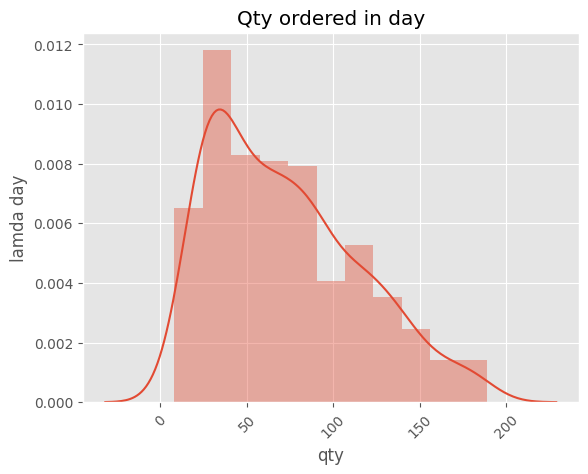

In [ ]:
sns.distplot(df_total.groupby('accepted_for_processing')['quantity'].sum())
plt.xticks(rotation=45)
plt.xlabel('qty')
plt.ylabel('lamda day')
plt.title('Qty ordered in day')

<Axes: >

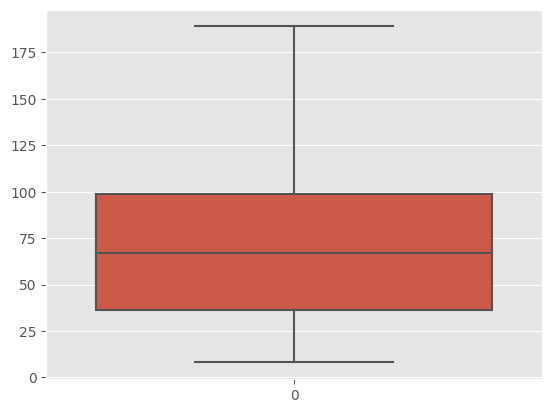

In [ ]:
sns.boxplot(df_total.groupby('accepted_for_processing')['quantity'].sum())

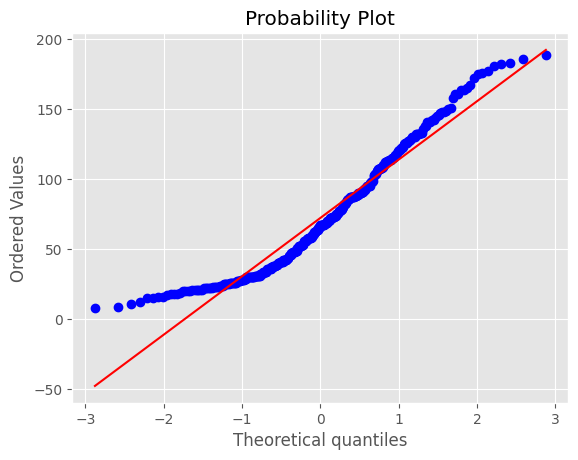

In [ ]:

import pylab
import scipy.stats as stats
stats.probplot(df_total.groupby('accepted_for_processing')['quantity'].sum(), dist="norm", plot=pylab)
pylab.show()

Text(0.5, 1.0, 'QTY ordered')

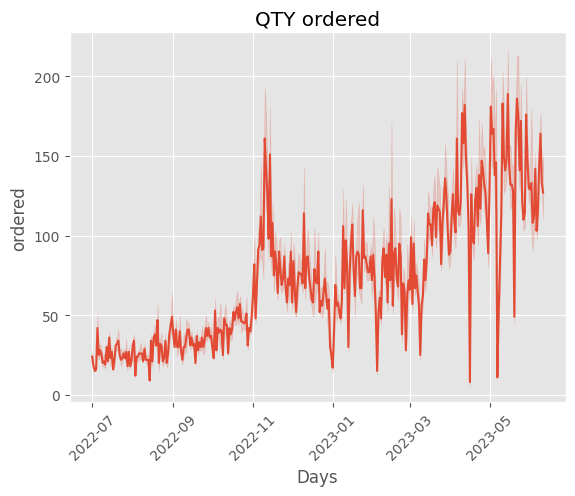

In [ ]:
sns.lineplot(data=df_total, x="accepted_for_processing", y='quantity', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('ordered')
plt.title('QTY ordered')

Text(0.5, 1.0, 'Total day amount')

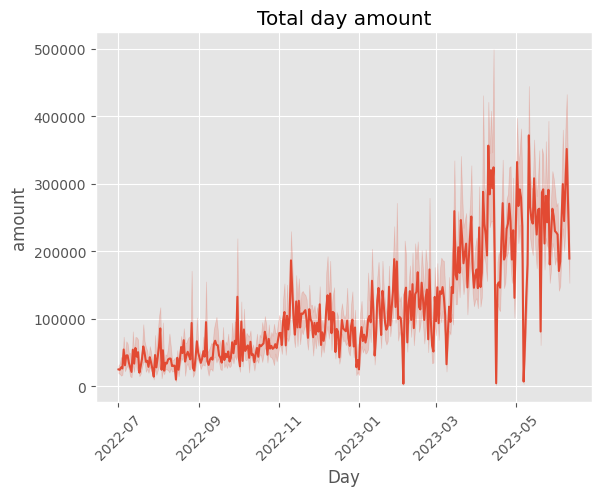

In [ ]:
sns.lineplot(data=df_total, x="accepted_for_processing", y='sending_amount', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Day')
plt.ylabel('amount')
plt.title('Total day amount')

In [ ]:
df_total.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,58605598-0043,58605598-0043-2,2022-09-30,2022-10-05,Доставлен,2022-10-11,2120.0,подшипники опоры стойки амортизатора шариковые...,2120.0,1,2650.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,NaN,Премиум
1,02346146-0169,02346146-0169-2,2022-09-30,2022-10-01,Доставлен,2022-10-07,4250.0,Комплект стеклоочистителей SWF VisioFlex OE 48...,4250.0,1,5312.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Московская область Север (Недействительный),Московская Область,Мытищи,Премиум
2,67499227-0058,67499227-0058-1,2022-09-30,2022-10-01,Доставлен,2022-10-06,20550.0,Радиатор охлаждения двигателя (технология пайк...,20550.0,1,25687.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Тверь,Тверская Область,Зубцов,Не премиум
3,50713611-0111,50713611-0111-2,2022-09-30,2022-10-01,Доставлен,2022-10-04,1849.0,Комплект свечей зажигания 1885510060 на Solari...,1849.0,1,2160.0,14%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Петрозаводск,Республика Карелия,Медвежьегорск,Не премиум
4,84641976-0001,84641976-0001-2,2022-09-30,2022-10-01,Доставлен,2022-10-08,960.0,"Натяжной ролик, поликлиновой ремень Zekkert SR...",960.0,1,1200.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Нижний Новгород,Нижегородская Область,NaN,Не премиум


In [ ]:
df_total_reveneu = df_total.groupby('accepted_for_processing')[['sending_amount','quantity']].sum().reset_index()

In [ ]:
df_total_reveneu.head()

,accepted_for_processing,sending_amount,quantity
0,2022-07-01,25240.0,24
1,2022-07-02,24630.0,18
2,2022-07-03,28270.0,15
3,2022-07-04,26640.0,16
4,2022-07-05,54680.0,42


In [ ]:
# корреляция между количеством заказов и суммой заказов
df_total_reveneu[['quantity','sending_amount']].corr()

,quantity,sending_amount
quantity,1.000000,0.921946
sending_amount,0.921946,1.000000


Корреляция очень сильная между переменными. Но как знаем корреляции доверять не стоит, но для теста мы попробуем :)

#Анализ времянных рядов, создание контрольной группы для а/б теста

In [ ]:
df_total_reveneu.rename(columns = {'accepted_for_processing':'ds', 'quantity':'y'}, inplace = True)

In [ ]:
holidays_dict = holidays.RU(years=(2022, 2023))
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index':'ds', 0:'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

,ds,holiday
0,2022-01-01,New Year Holidays
1,2022-01-02,New Year Holidays
2,2022-01-03,New Year Holidays
3,2022-01-04,New Year Holidays
4,2022-01-05,New Year Holidays
5,2022-01-06,New Year Holidays
6,2022-01-07,Orthodox Christmas Day
7,2022-01-08,New Year Holidays
8,2022-02-23,Fatherland Defender's Day
9,2022-03-08,International Women's Day


In [ ]:
# Период, который надо отрезать и предсказать (проверка модели)
predictions = 14

# Отрезаем из обучающей выборки последние N точек, чтобы измерить на них качество
df_total_reveneu = df_total_reveneu[:-predictions]

In [ ]:
# Настраиваем prophet – говорим ему учитывать праздники и сезонности
m = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
m.fit(df_total_reveneu)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpthguiclp/u0izkrnd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpthguiclp/q2xzdbq1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64962', 'data', 'file=/tmp/tmpthguiclp/u0izkrnd.json', 'init=/tmp/tmpthguiclp/q2xzdbq1.json', 'output', 'file=/tmp/tmpthguiclp/prophet_model6h9xjr6b/prophet_model-20230702075823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

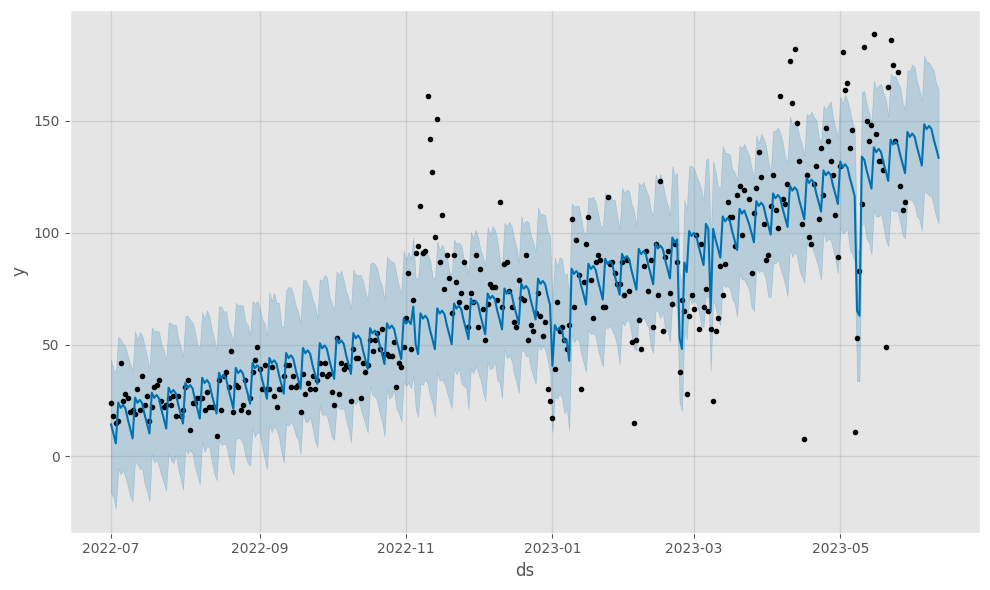

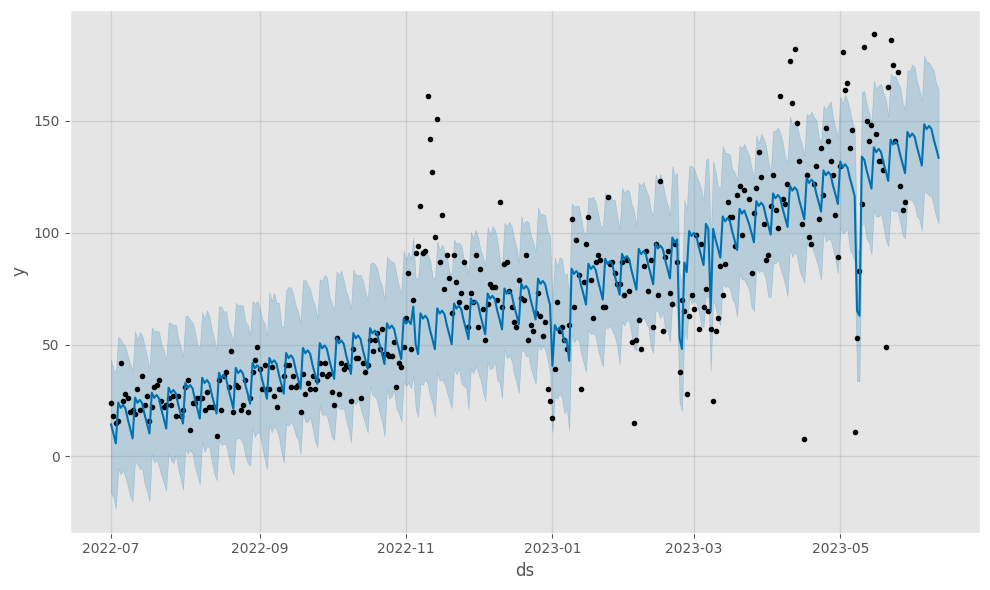

In [ ]:
m.plot(forecast)

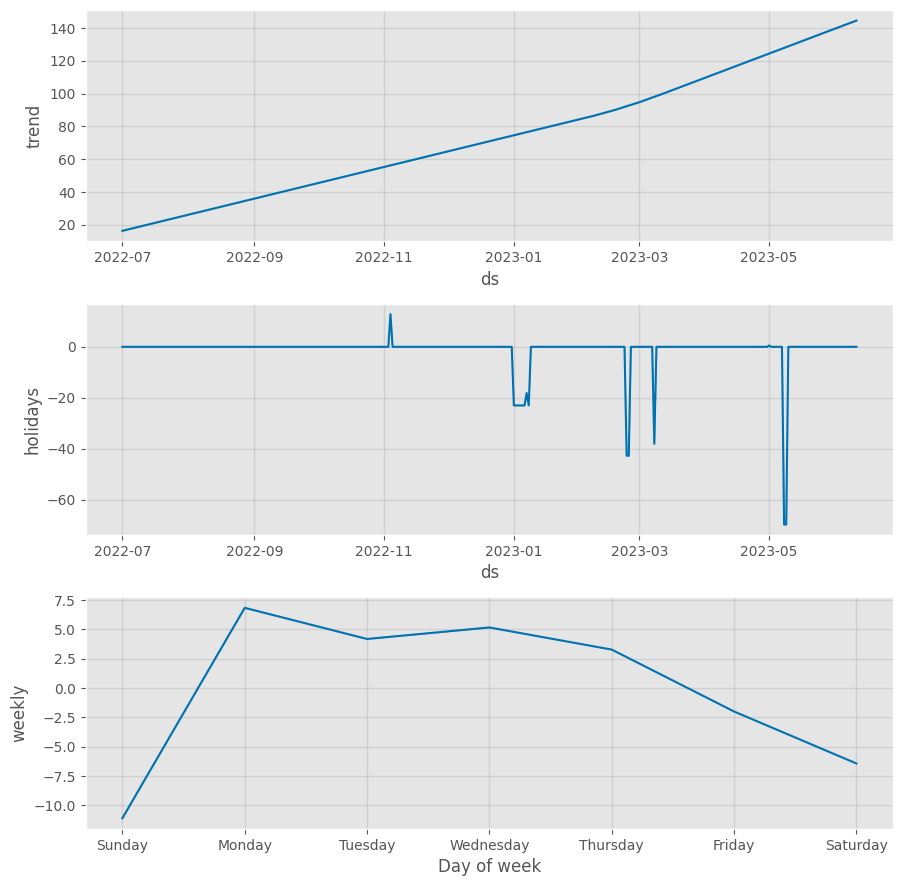

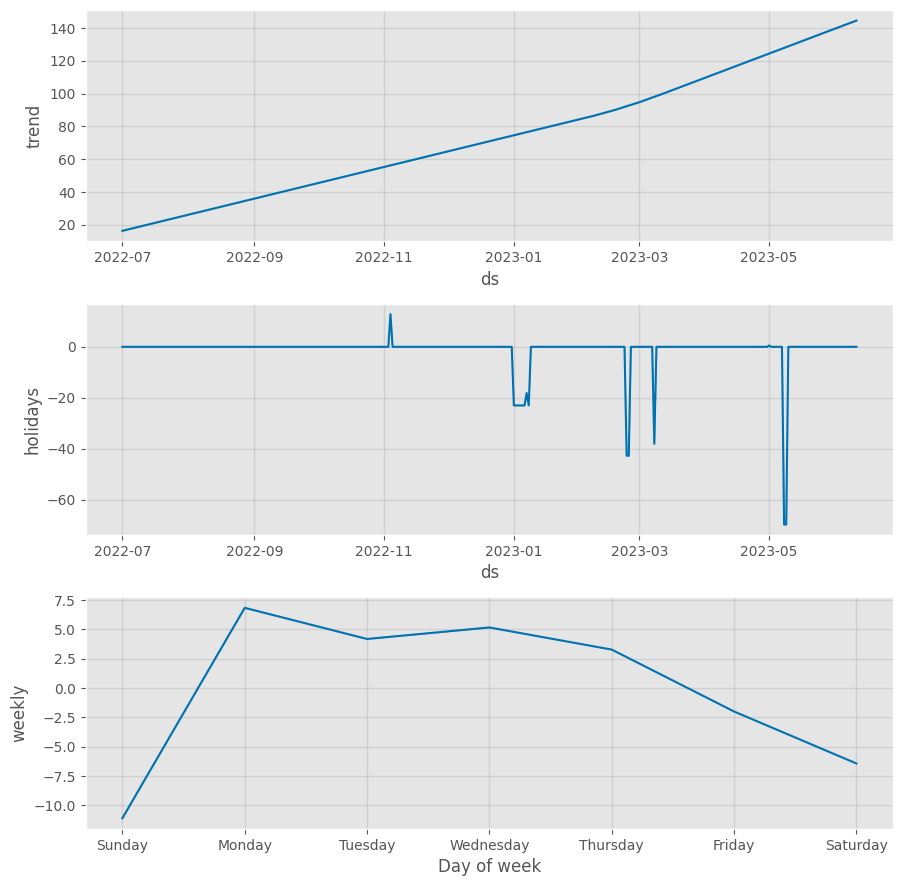

In [ ]:
m.plot_components(forecast)

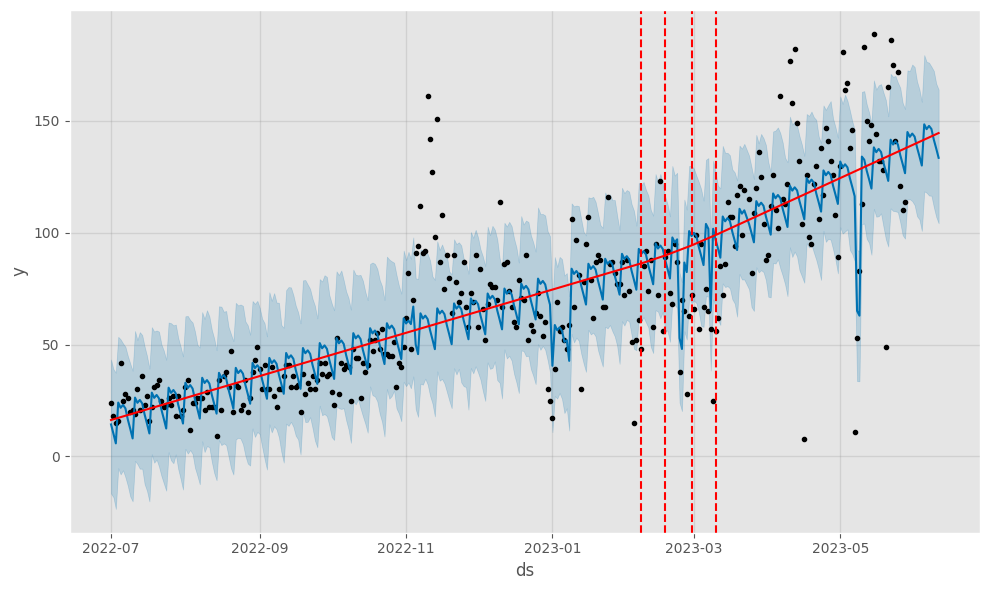

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# Смотрим на ошибки модели
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_total_reveneu.set_index('ds'))
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  nan %
MAE (средняя абсолютная ошибка) –  nan


In [ ]:
len(forecast)

345

In [ ]:
prediction_days = 30
final_train_df = df_total_reveneu
f = Prophet(holidays=df_holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=False)
f.fit(final_train_df)
final_future = f.make_future_dataframe(periods=prediction_days)
final_forecast = f.predict(final_future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpthguiclp/mw03l5lt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpthguiclp/c81w_gid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66486', 'data', 'file=/tmp/tmpthguiclp/mw03l5lt.json', 'init=/tmp/tmpthguiclp/c81w_gid.json', 'output', 'file=/tmp/tmpthguiclp/prophet_modelmvf7mbdy/prophet_model-20230702075826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:58:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:58:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
final_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Fatherland Defender's Day,Fatherland Defender's Day_lower,Fatherland Defender's Day_upper,Holiday of Spring and Labor,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-01,16.323798,-15.082204,43.009118,16.323798,16.323798,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.989978,-1.989978,-1.989978,0.0,0.0,0.0,14.333819
1,2022-07-02,16.640452,-19.868740,39.383160,16.640452,16.640452,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-6.420800,-6.420800,-6.420800,0.0,0.0,0.0,10.219652
2,2022-07-03,16.957106,-23.833078,34.789434,16.957106,16.957106,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-11.084437,-11.084437,-11.084437,0.0,0.0,0.0,5.872669
3,2022-07-04,17.273761,-5.253654,53.927013,17.273761,17.273761,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.845141,6.845141,6.845141,0.0,0.0,0.0,24.118902
4,2022-07-05,17.590415,-7.354440,51.679887,17.590415,17.590415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.191342,4.191342,4.191342,0.0,0.0,0.0,21.781757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2023-06-23,150.494112,117.577303,179.194589,150.283683,150.735603,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.989978,-1.989978,-1.989978,0.0,0.0,0.0,148.504134
357,2023-06-24,150.984628,113.699785,174.995895,150.761585,151.247347,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-6.420800,-6.420800,-6.420800,0.0,0.0,0.0,144.563827
358,2023-06-25,151.475143,111.982218,169.936596,151.237190,151.759522,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-11.084437,-11.084437,-11.084437,0.0,0.0,0.0,140.390706
359,2023-06-26,151.965659,127.555169,187.676165,151.711806,152.266145,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.845141,6.845141,6.845141,0.0,0.0,0.0,158.810800


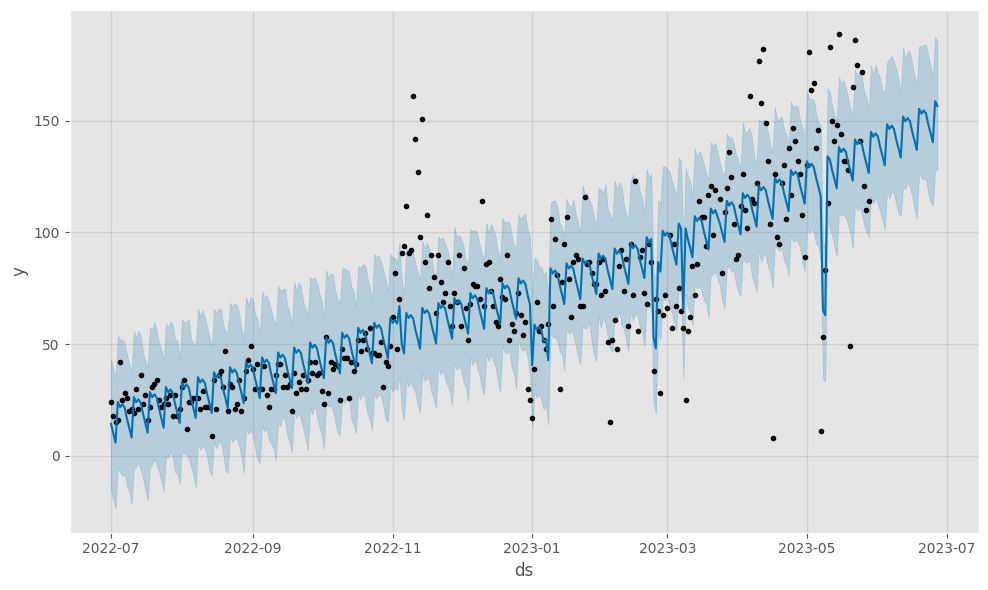

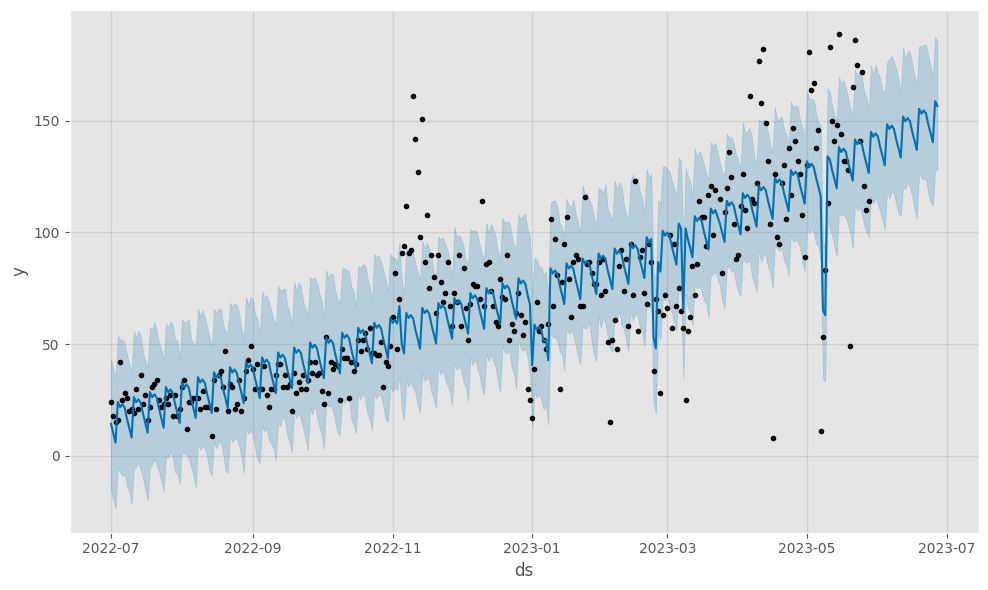

In [ ]:
# Смотрим, что предсказалось на полный период
f.plot(final_forecast)

In [ ]:
final_forecast[['ds','yhat']].tail(30)

,ds,yhat
331,2023-05-29,145.076359
332,2023-05-30,142.913075
333,2023-05-31,144.384093
334,2023-06-01,142.989655
335,2023-06-02,138.203302
336,2023-06-03,134.262996
337,2023-06-04,130.089875
338,2023-06-05,148.509969
339,2023-06-06,146.346685
340,2023-06-07,147.817703


In [ ]:
final_forecast['yhat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 361 entries, 0 to 360
Series name: yhat
Non-Null Count  Dtype  
--------------  -----  
361 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [ ]:
final_forecast['yhat'] = round(final_forecast['yhat'],0)

In [ ]:
final_forecast[['ds','yhat']].tail(30)

,ds,yhat
331,2023-05-29,145.0
332,2023-05-30,143.0
333,2023-05-31,144.0
334,2023-06-01,143.0
335,2023-06-02,138.0
336,2023-06-03,134.0
337,2023-06-04,130.0
338,2023-06-05,149.0
339,2023-06-06,146.0
340,2023-06-07,148.0


In [ ]:
final_forecast['yhat'] = final_forecast['yhat'].astype(int)

In [ ]:
final_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Fatherland Defender's Day,Fatherland Defender's Day_lower,Fatherland Defender's Day_upper,Holiday of Spring and Labor,...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-01,16.323798,-15.082204,43.009118,16.323798,16.323798,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.989978,-1.989978,-1.989978,0.0,0.0,0.0,14
1,2022-07-02,16.640452,-19.868740,39.383160,16.640452,16.640452,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-6.420800,-6.420800,-6.420800,0.0,0.0,0.0,10
2,2022-07-03,16.957106,-23.833078,34.789434,16.957106,16.957106,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-11.084437,-11.084437,-11.084437,0.0,0.0,0.0,6
3,2022-07-04,17.273761,-5.253654,53.927013,17.273761,17.273761,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.845141,6.845141,6.845141,0.0,0.0,0.0,24
4,2022-07-05,17.590415,-7.354440,51.679887,17.590415,17.590415,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.191342,4.191342,4.191342,0.0,0.0,0.0,22


# Подготовка к проведению а/б теста

In [ ]:
control = final_forecast[['ds','yhat']].tail(30)

In [ ]:
control = control.reset_index()

In [ ]:
control.head()

,index,ds,yhat
0,331,2023-05-29,145
1,332,2023-05-30,143
2,333,2023-05-31,144
3,334,2023-06-01,143
4,335,2023-06-02,138


In [ ]:
control = control.drop('index', axis=1)

In [ ]:
control.head(30)

,ds,yhat
0,2023-05-29,145
1,2023-05-30,143
2,2023-05-31,144
3,2023-06-01,143
4,2023-06-02,138
5,2023-06-03,134
6,2023-06-04,130
7,2023-06-05,149
8,2023-06-06,146
9,2023-06-07,148


<ipython-input-87-baa5f631715c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control['yhat'])


<Axes: xlabel='yhat', ylabel='Density'>

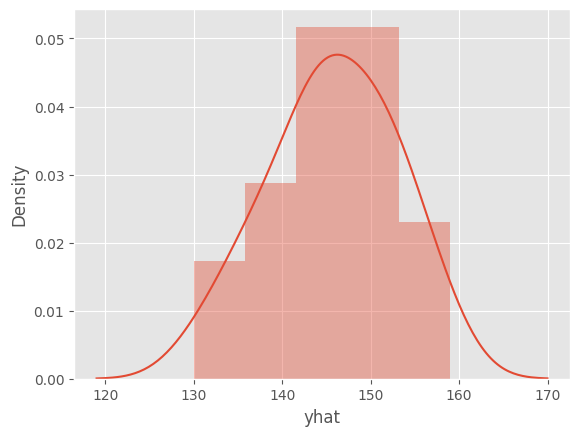

In [ ]:
sns.distplot(control['yhat'])

<Axes: >

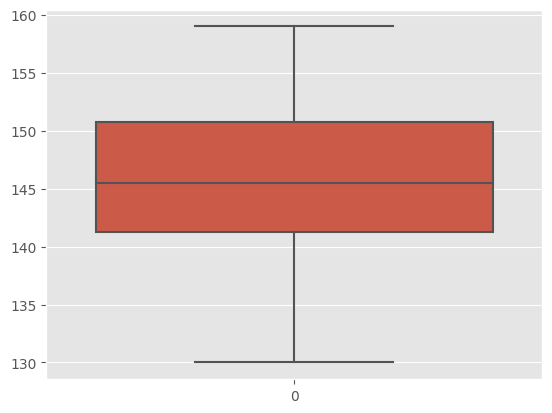

In [ ]:
sns.boxplot(control['yhat'])

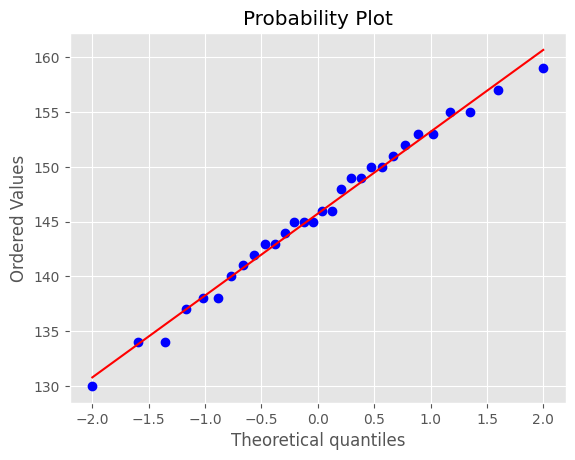

In [ ]:
stats.probplot(control['yhat'], dist="norm", plot=pylab)
pylab.show()

In [ ]:
control['ds'].agg(['min','max'])

min   2023-05-29
max   2023-06-27
Name: ds, dtype: datetime64[ns]

https://drive.google.com/file/d/1cTV6MmFnKDlJbxhS7SgGx2uZucIZKiGL/view?usp=sharing

In [ ]:
!gdown  --id 1cTV6MmFnKDlJbxhS7SgGx2uZucIZKiGL

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cTV6MmFnKDlJbxhS7SgGx2uZucIZKiGL
To: /content/29.05 - 27.06.csv
100% 2.75M/2.75M [00:00<00:00, 52.6MB/s]


In [ ]:
test_df = pd.read_csv('/content/29.05 - 27.06.csv',delimiter=';', skiprows=0, low_memory=False)

In [ ]:
test_df.head()

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Имя покупателя,Телефон покупателя,Email покупателя,Имя получателя,Телефон получателя,Адрес доставки,Индекс,Склад отгрузки,Перевозчик,Название метода
0,01897248-0113,01897248-0113-1,2023-06-27 23:44:02,2023-06-28 14:00:00,Доставляется,NaN,1800.0,RUB,Поликлиновой ремень 5PK913,819135981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
1,21460930-0104,21460930-0104-1,2023-06-27 23:39:41,2023-06-28 14:00:00,Доставляется,NaN,1760.0,RUB,"Датчик положения рроссельной заслонки, 550149",839350490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
2,24064579-0153,24064579-0153-4,2023-06-27 22:25:59,2023-06-28 14:00:00,Доставляется,NaN,364.0,RUB,Насадка сменная для резьбового заклёпочника М4...,888604176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
3,40836775-0103,40836775-0103-4,2023-06-27 22:19:23,2023-06-28 14:00:00,Доставляется,NaN,4360.0,RUB,Пружина ходовой части Zekkert SF-2454,882239247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"
4,38537066-0099,38537066-0099-4,2023-06-27 21:44:01,2023-06-28 14:00:00,Доставляется,NaN,760.0,RUB,"Втулка стабилизатора Masuma, MP-1100",748083845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Север сутки,Доставка Ozon,"Доставка Ozon самостоятельно, Санкт-Петербург"


In [ ]:
test_df_index_en = ['Order number',
  'Number of departure',
  'Accepted for processing',
  'Shipping date',
  'Status',
  'Delivery date',
  'Sending amount',
  'Departure currency code',
  'Name of product',
  'OZON id',
  'Vendor code',
  'Total cost of goods',
  'Product currency code',
  'Quantity',
  'Cost of delivery',
  'Associated Departures',
  'Product price before discounts',
  'Discount %',
  'Discount rub',
  'Stock',
  'Top Barcode',
  'Lower barcode',
  'Shipping cluster',
  'Delivery cluster',
  'Delivery region',
  'Delivery city',
  'Delivery method',
  'Customer segment',
  'Payment method',
  'Entity',
  'Buyer name',
  'Customer phone',
  'Buyer Email',
  'Receiver name',
  'Recipient phone',
  'Delivery address',
  'Index',
  'Shipping warehouse',
  'Carrier',
  'Method name']

In [ ]:
test_df.columns = test_df_index_en

In [ ]:
test_df.columns = test_df.columns.str.replace(' ','_').str.lower()

In [ ]:
test_df = test_df.iloc[0:, [0,1,2,3,4,5,6,8,11,13,16,17,19,22,23,24,25,27,]]

In [ ]:
test_df['accepted_for_processing'] = pd.to_datetime(test_df['accepted_for_processing']).dt.date
test_df['shipping_date'] = pd.to_datetime(test_df['shipping_date']).dt.date
test_df['delivery_date'] = pd.to_datetime(test_df['delivery_date']).dt.date

In [ ]:
test_df.head()

,order_number,number_of_departure,accepted_for_processing,shipping_date,status,delivery_date,sending_amount,name_of_product,total_cost_of_goods,quantity,product_price_before_discounts,discount_%,stock,shipping_cluster,delivery_cluster,delivery_region,delivery_city,customer_segment
0,01897248-0113,01897248-0113-1,2023-06-27,2023-06-28,Доставляется,NaT,1800.0,Поликлиновой ремень 5PK913,1800.0,1,2250.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Вологда,Вологодская Область,Вологда,Не премиум
1,21460930-0104,21460930-0104-1,2023-06-27,2023-06-28,Доставляется,NaT,1760.0,"Датчик положения рроссельной заслонки, 550149",1760.0,1,2200.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Москва ЮЗАО 2,Москва,Москва,Премиум
2,24064579-0153,24064579-0153-4,2023-06-27,2023-06-28,Доставляется,NaT,364.0,Насадка сменная для резьбового заклёпочника М4...,364.0,1,537.0,32%,"Системная виртуальная скидка селлера, Хиты. О!...",Санкт-Петербург Север,Москва ЮАО 2,Москва,Москва,Премиум
3,40836775-0103,40836775-0103-4,2023-06-27,2023-06-28,Доставляется,NaT,4360.0,Пружина ходовой части Zekkert SF-2454,2180.0,2,2725.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Ленинградская область Север,Ленинградская Область,NaN,Премиум
4,38537066-0099,38537066-0099-4,2023-06-27,2023-06-28,Доставляется,NaT,760.0,"Втулка стабилизатора Masuma, MP-1100",380.0,2,475.0,20%,Системная виртуальная скидка селлера,Санкт-Петербург Север,Сыктывкар,Республика Коми,Инта,Не премиум


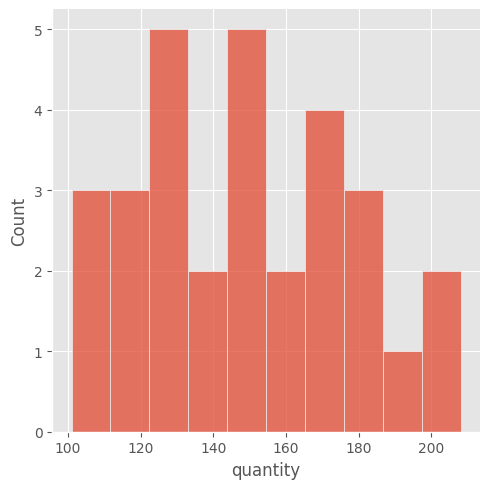

In [ ]:
sns.displot(test_df.groupby('accepted_for_processing')['quantity'].sum(), bins = 10)

<Axes: >

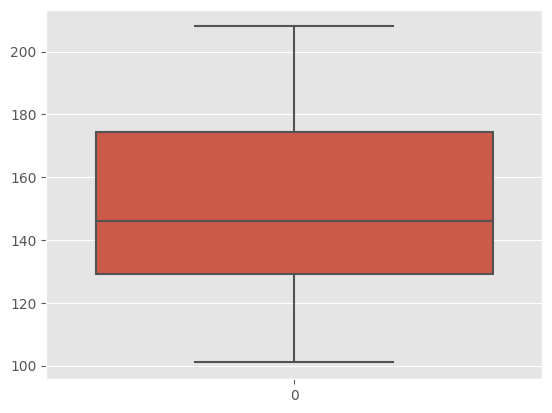

In [ ]:
sns.boxplot(test_df.groupby('accepted_for_processing')['quantity'].sum())

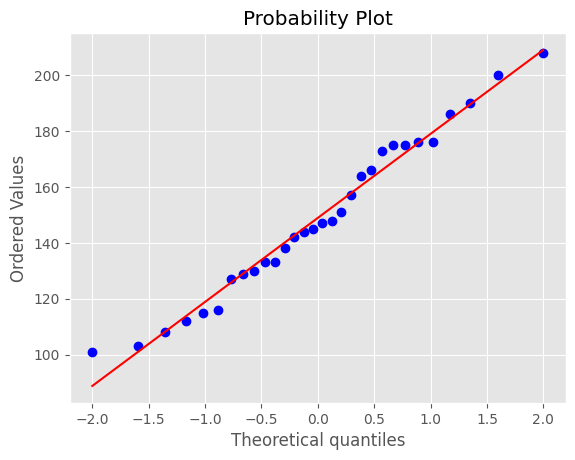

In [ ]:
stats.probplot(test_df.groupby('accepted_for_processing')['quantity'].sum(), dist="norm", plot=pylab)
pylab.show()

Просмотрев графики QQ - plot, контрольной и тестовой группы, можно сделать вывод, что выборки распределены близко к нормальному

In [ ]:
test_group = test_df.groupby('accepted_for_processing')['quantity'].sum()

In [ ]:
test_group = test_group.reset_index()

In [ ]:
test_group.head()

,accepted_for_processing,quantity
0,2023-05-29,176
1,2023-05-30,148
2,2023-05-31,130
3,2023-06-01,129
4,2023-06-02,133


In [ ]:
test_group.rename(columns = {'accepted_for_processing':'ds', 'quantity':'test'}, inplace = True)

In [ ]:
test_group['ds'].agg(['min','max'])

min    2023-05-29
max    2023-06-27
Name: ds, dtype: object

In [ ]:
test_group['ds'].info

<bound method Series.info of 0     2023-05-29
1     2023-05-30
2     2023-05-31
3     2023-06-01
4     2023-06-02
5     2023-06-03
6     2023-06-04
7     2023-06-05
8     2023-06-06
9     2023-06-07
10    2023-06-08
11    2023-06-09
12    2023-06-10
13    2023-06-11
14    2023-06-12
15    2023-06-13
16    2023-06-14
17    2023-06-15
18    2023-06-16
19    2023-06-17
20    2023-06-18
21    2023-06-19
22    2023-06-20
23    2023-06-21
24    2023-06-22
25    2023-06-23
26    2023-06-24
27    2023-06-25
28    2023-06-26
29    2023-06-27
Name: ds, dtype: object>

In [ ]:
control['ds'].info

<bound method Series.info of 0    2023-05-29
1    2023-05-30
2    2023-05-31
3    2023-06-01
4    2023-06-02
5    2023-06-03
6    2023-06-04
7    2023-06-05
8    2023-06-06
9    2023-06-07
10   2023-06-08
11   2023-06-09
12   2023-06-10
13   2023-06-11
14   2023-06-12
15   2023-06-13
16   2023-06-14
17   2023-06-15
18   2023-06-16
19   2023-06-17
20   2023-06-18
21   2023-06-19
22   2023-06-20
23   2023-06-21
24   2023-06-22
25   2023-06-23
26   2023-06-24
27   2023-06-25
28   2023-06-26
29   2023-06-27
Name: ds, dtype: datetime64[ns]>

In [ ]:
test_group['ds'] = pd.to_datetime(test_group['ds'])

In [ ]:
test_group['test'] = round(test_group['test'],0)

In [ ]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      30 non-null     datetime64[ns]
 1   test    30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [ ]:
ab_df = pd.merge(control, test_group, how = 'left', on = 'ds')

In [ ]:
ab_df.head()

,ds,yhat,test
0,2023-05-29,145,176
1,2023-05-30,143,148
2,2023-05-31,144,130
3,2023-06-01,143,129
4,2023-06-02,138,133


In [ ]:
len(ab_df)

30

In [ ]:
ab_df['test'].unique()

array([176, 148, 130, 129, 133, 108, 112, 142, 103, 115, 145, 164, 127,
       116, 173, 200, 190, 166, 138, 175, 151, 208, 186, 101, 157, 144,
       147])

In [ ]:
ab_df['test'].astype(int)

0     176
1     148
2     130
3     129
4     133
5     108
6     112
7     142
8     103
9     115
10    145
11    164
12    133
13    127
14    116
15    173
16    200
17    190
18    166
19    138
20    175
21    151
22    208
23    176
24    186
25    175
26    101
27    157
28    144
29    147
Name: test, dtype: int64

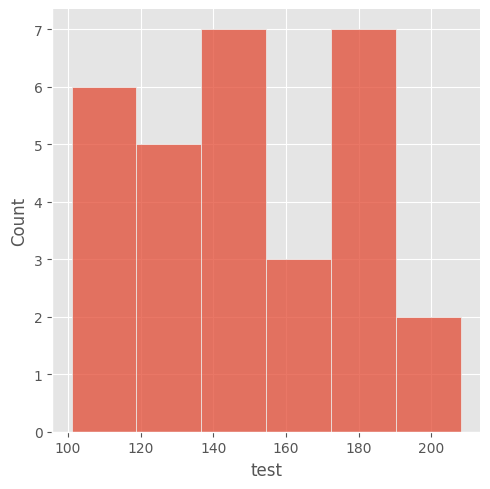

In [ ]:
sns.displot(ab_df['test'])

array([[<Axes: title={'center': 'ds'}>, <Axes: title={'center': 'yhat'}>],
       [<Axes: title={'center': 'test'}>, <Axes: >]], dtype=object)

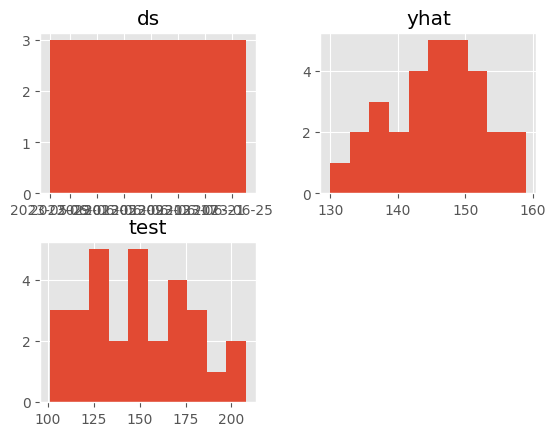

In [ ]:
ab_df.hist(bins = 10)

# А/Б тест

In [ ]:
mannwhitneyu(ab_df['yhat'],
             ab_df['test'])

MannwhitneyuResult(statistic=443.5, pvalue=0.9292857235575951)

In [ ]:
if abs(ab_df['yhat'].var()/ab_df['test'].var()-1)<0.25:
        Variance_equality=True
else:
        Variance_equality=False

In [ ]:
# применяем двух-выборочный T-test (Две выборки)
alpha=0.05
stat, p = ttest_ind(ab_df['yhat'],ab_df['test'], equal_var=Variance_equality) # применяем тест Стьюдента

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=-0.582, p=0.565
Одинаковые распределения (не отвергаем H0)


In [ ]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len,
            replace = True # параметр возвращения
        ).values

        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values

        boot_data.append(statistic(samples_1-samples_2))
    pd_boot_data = pd.DataFrame(boot_data)

    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])

    p_1 = norm.cdf(
        x = 0,
        loc = np.mean(boot_data),
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0,
        loc = -np.mean(boot_data),
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2

    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else:
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')

    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    return {"boot_data": boot_data,
            "quants": quants,
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

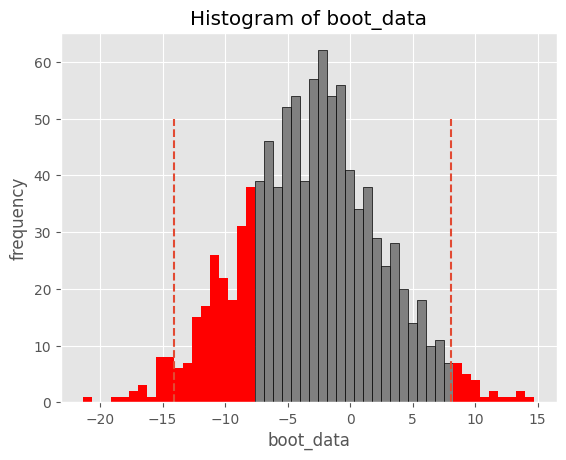

{'boot_data': [-1.6,
  -12.433333333333334,
  3.7666666666666666,
  -6.4,
  -0.9333333333333333,
  -5.233333333333333,
  4.633333333333334,
  -0.7666666666666667,
  0.1,
  1.7,
  -5.866666666666666,
  -1.2,
  -3.6666666666666665,
  -10.433333333333334,
  -7.5,
  -3.6666666666666665,
  2.4,
  -5.9,
  -3.1333333333333333,
  6.366666666666666,
  2.066666666666667,
  1.7333333333333334,
  -1.1,
  -3.2,
  -0.23333333333333334,
  -8.4,
  -1.8,
  -10.3,
  3.3666666666666667,
  4.666666666666667,
  1.5666666666666667,
  -1.3,
  0.9666666666666667,
  -6.7,
  -14.466666666666667,
  1.2,
  0.5666666666666667,
  -2.7,
  -7.366666666666666,
  4.566666666666666,
  -5.066666666666666,
  -2.6333333333333333,
  1.1,
  -7.966666666666667,
  -0.9,
  -5.433333333333334,
  -5.066666666666666,
  -7.633333333333334,
  -1.1,
  7.466666666666667,
  -8.166666666666666,
  -0.13333333333333333,
  -0.8666666666666667,
  -1.5666666666666667,
  8.966666666666667,
  -2.8,
  -5.5,
  -1.4,
  5.0,
  -10.6,
  -13.4,
  -4

In [ ]:
get_bootstrap(
    ab_df['yhat'], # числовые значения первой выборки
   ab_df['test'], # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

Результатом приходим к выводу, что значимых различий между выборками нет, не отвергает Ho